# TOUR AND TRAVEL CUSTOMER CHURN PREDICTION

#####    •   The Tour & Travels Customer Churn Prediction dataset assists a travel company in predicting customer churn.
#####    •   The goal is to build predictive models to save company resources. The dataset, used for practice and in a hackathon, is freely available. Analysts can perform exploratory data analyses to reveal insights for effective churn prediction. The binary target variable distinguishes customers who churn (1) from those who don't (0), guiding the modeling process.

##### It includes indicators such as:
<li>Age --> Age of user</li>
<li>FrequentFlyer --> Whether Customer takes frequent flights</li>
<li>AnnualIncomeClass --> Class of annual income of user</li>
<li>ServicesOpted --> Number of times services opted during recent years</li>
<li>AccountSyncedToSocialMedia --> Whether Company Account Of User</li> <li>Synchronised to Their Social Media</li>
<li>BookedHotelOrNot --> Whether the customer book lodgings/Hotels using company services</li>
<li>Target --> 1- Customer Churns 0- Customer Doesnt Churn</li>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [2]:
# Load the data to pandas dataframe
df = pd.read_csv("Customertravel.csv")

In [3]:
# Assess the first 5 rows to explore the data
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [4]:
# Check the data types and the shape of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


There is no empty rows and all the data types are correct.

In [5]:
# Check the summary statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,954.0,32.109015,3.337388,27.0,30.0,31.0,35.0,38.0
ServicesOpted,954.0,2.437107,1.606233,1.0,1.0,2.0,4.0,6.0
Target,954.0,0.234801,0.424097,0.0,0.0,0.0,0.0,1.0


We have average age of 32 in range from 27 to 38 (no outliers).

The target averae is 0.23 wich indicates the churn rate is 23%.

In [6]:
for i in range(len(list(df.columns))):
    print(df[df.columns[i]].value_counts(),end="\n\n")

Age
30    236
37    126
34    107
31    103
28     71
29     70
36     67
27     62
35     52
38     31
33     29
Name: count, dtype: int64

FrequentFlyer
No           608
Yes          286
No Record     60
Name: count, dtype: int64

AnnualIncomeClass
Middle Income    409
Low Income       386
High Income      159
Name: count, dtype: int64

ServicesOpted
1    404
2    176
3    124
4    117
5     69
6     64
Name: count, dtype: int64

AccountSyncedToSocialMedia
No     594
Yes    360
Name: count, dtype: int64

BookedHotelOrNot
No     576
Yes    378
Name: count, dtype: int64

Target
0    730
1    224
Name: count, dtype: int64



In [7]:
# Split the data into features and target label
churn_raw = df['Target']
features_raw = df.drop('Target', axis = 1)

In [8]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Age', 'ServicesOpted']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])

# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot
0,0.636364,No,Middle Income,1.0,No,Yes
1,0.636364,Yes,Low Income,0.8,Yes,No
2,0.909091,No,Middle Income,0.4,Yes,No
3,0.272727,No,Middle Income,0.2,No,No
4,0.272727,No,Low Income,0.0,No,No


In [9]:
# One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

12 total features after one-hot encoding.


In [10]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    churn_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 763 samples.
Testing set has 191 samples.


In [11]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
TP = np.sum(churn_raw)
FP = churn_raw.count()
TN = 0
FN = 0
# Calculate accuracy, precision and recall
accuracy = (TP + TN )/ (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# Calculate F-score using the formula below for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1+beta**2)*((precision*recall)/(((beta**2)*precision)+recall)) 

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.1902, F-score: 0.2269]


In [12]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, f1_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = f1_score(y_train[:300], predictions_train)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = f1_score(y_test, predictions_test)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

DecisionTreeClassifier trained on 7 samples.
DecisionTreeClassifier trained on 76 samples.
DecisionTreeClassifier trained on 763 samples.
SVC trained on 7 samples.
SVC trained on 76 samples.
SVC trained on 763 samples.
RandomForestClassifier trained on 7 samples.
RandomForestClassifier trained on 76 samples.
RandomForestClassifier trained on 763 samples.


e:\Learning\Internships\Project 2 - TOUR AND TRAVEL CUSTOMER CHURN PREDICTION\visuals.py:118: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  pl.tight_layout()


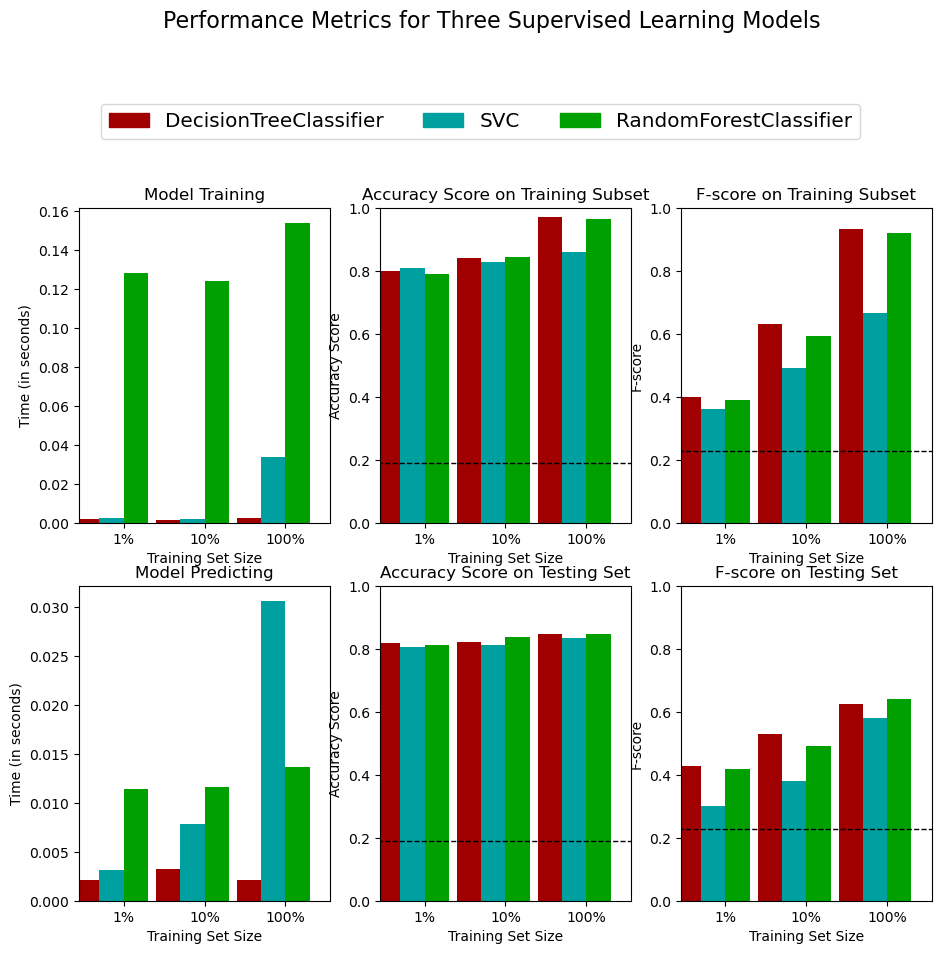

In [ ]:
# Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the three models
clf_A = DecisionTreeClassifier()
clf_B = SVC()
clf_C = RandomForestClassifier()

# Calculate the number of samples for 1%, 10%, and 100% of the training data
# samples_100 is the entire training set 
# samples_10 is 10% of samples_100
# samples_1 is 1% of samples_100
samples_100 = len(y_train)
samples_10 = int(len(y_train) * 0.1)
samples_1 = int(len(y_train) * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [17]:
display(results["DecisionTreeClassifier"])

{0: {'train_time': 0.0018613338470458984,
  'pred_time': 0.0021293163299560547,
  'acc_train': 0.8,
  'acc_test': 0.8167539267015707,
  'f_train': 0.4,
  'f_test': 0.4262295081967213},
 1: {'train_time': 0.0015320777893066406,
  'pred_time': 0.0032417774200439453,
  'acc_train': 0.84,
  'acc_test': 0.8219895287958116,
  'f_train': 0.6307692307692307,
  'f_test': 0.5277777777777778},
 2: {'train_time': 0.0026133060455322266,
  'pred_time': 0.0021219253540039062,
  'acc_train': 0.97,
  'acc_test': 0.8481675392670157,
  'f_train': 0.9323308270676691,
  'f_test': 0.6233766233766234}}

##### Decision Tree Classifier is the best of the three models according to the run time and the accuracy and f-score.
##### Accuracy: 85%
##### F-score: 62%

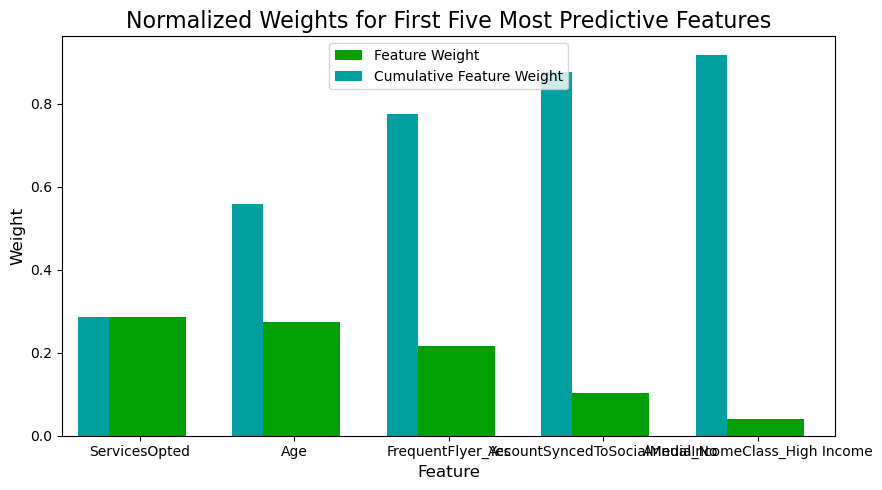

In [ ]:
# Train the supervised model on the training set using .fit(X_train, y_train)
model = clf_A.fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

In [31]:
# Import functionality for cloning a model
from sklearn.base import clone
from sklearn.metrics import  fbeta_score
# Reduce the feature space
X_train_reduced = X_train[["ServicesOpted","Age"]]
X_test_reduced = X_test[["ServicesOpted","Age"]]

# Train on the "best" model found from grid search earlier
clf = (clone(clf_A)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, clf_A.predict(X_test))))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, clf_A.predict(X_test), beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8482
F-score on testing data: 0.6593

Final Model trained on reduced data
------
Accuracy on testing data: 0.8010
F-score on testing data: 0.5000


The reduced feature affected the accuracy and f-score negatively and the model didn't take too much time, so no reason to use the reduced feature model.